<a href="https://colab.research.google.com/github/matthew-sessions/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/matthew-sessions/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [3]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
Unnamed: 0       1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB


In [0]:
df['overweight'] =  df.weight > 153.5

In [6]:
df.head()

,Unnamed: 0,age,weight,exercise_time,overweight
0,0,44,118,192,False
1,1,41,161,35,True
2,2,46,128,220,False
3,3,39,216,57,True
4,4,28,116,182,False


In [7]:
crosstab = pd.crosstab(age_bin, df.overweight, normalize='columns')

NameError: ignored

In [0]:
crosstab.plot()

In [0]:
weightbin = pd.cut(df.weight,5)
crosstab2 = pd.crosstab(df.exercise_time,weightbin, normalize='columns')

crosstab2.plot()

In [0]:
!pip freeze

In [0]:
print(pd.__version__)

In [0]:
!pip install pandas==0.23.4

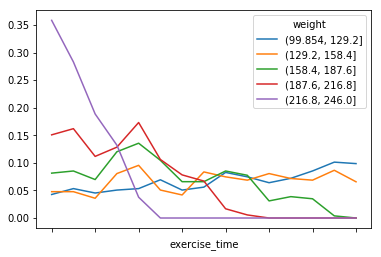

In [10]:
weightbin = pd.cut(df.weight,5)
exbin = pd.cut(df.exercise_time,15)
crosstab2 = pd.crosstab(exbin,weightbin, normalize='columns')

crosstab2.plot()

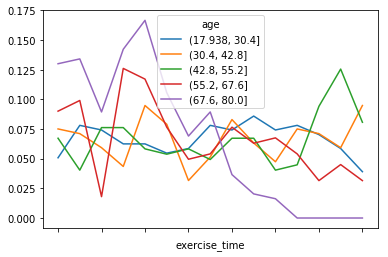

In [15]:
agebin = pd.cut(df.age,5)

crosstab3 = pd.crosstab(exbin,agebin, normalize='columns')

crosstab3.plot()

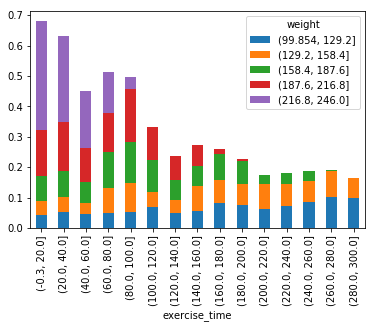

In [16]:
crosstab2.plot(kind='bar', stacked=True)



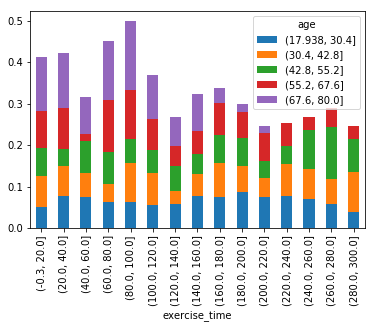

In [20]:
crosstab3.plot(kind='bar', stacked=True)

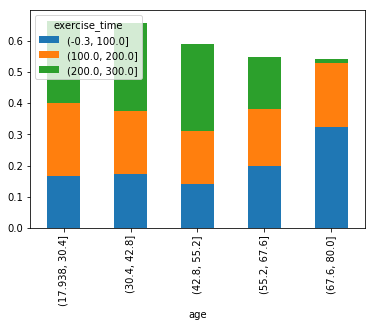

In [35]:
exbin3 = pd.cut(df.exercise_time, 3)
crosstab4 = pd.crosstab(agebin, exbin3, normalize='columns')
crosstab4.plot(kind='bar', stacked=True)

Text(0.5, 0, 'Time Ex.')

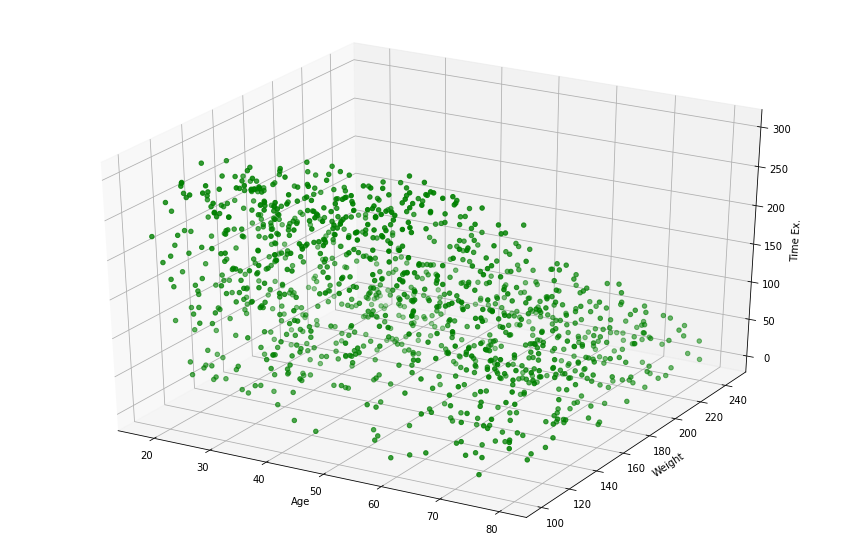

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.age, df.weight, df.exercise_time, c='g', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Time Ex.')

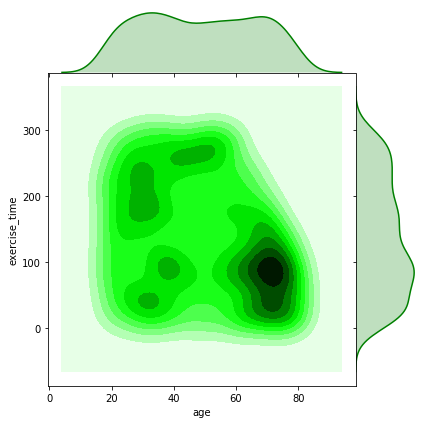

In [38]:
import seaborn as sns

sns.jointplot(df.age, df.exercise_time, kind="kde", space=0, color="g")

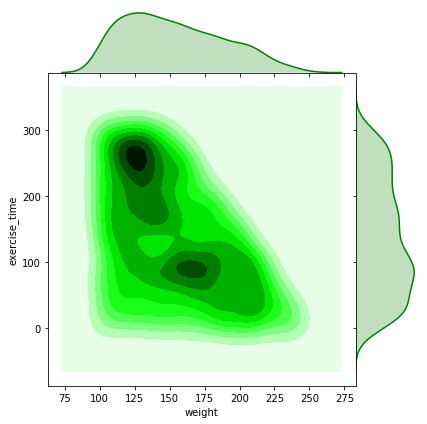

In [39]:
sns.jointplot(df.weight, df.exercise_time, kind="kde", space=0, color="g")

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. For this assignment I think age and weight could be considered discrete but they could also be considered countinuous. Time in ths assigment would be considered countinuous. I also put each variable into bins so in this case they are all discrete.

2. There is a strong correlation between weight and time exercised. There is also a corrilation between age and exersise.

3. There are real realationships between age and exercise time, and weight and exercise time. There is a slight corrilation between age and weight, but I would consider that spurious.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)